In [ ]:
# python code to plot results contained in jobs/ directory

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# EXCHANGE DT

In [2]:
RESULTS_DIR="./jobs/exchange-dt/"
MAX_NODES = 7
data = np.zeros((4, MAX_NODES))

for i in range(MAX_NODES):
    data[:, i] = np.fromfile(RESULTS_DIR + "scaling-" + str(i + 1) + ".txt", sep='\n')

# convert to milliseconds
data = data * 1000.0

# number of processes
p = np.arange(1, MAX_NODES + 1) * 36

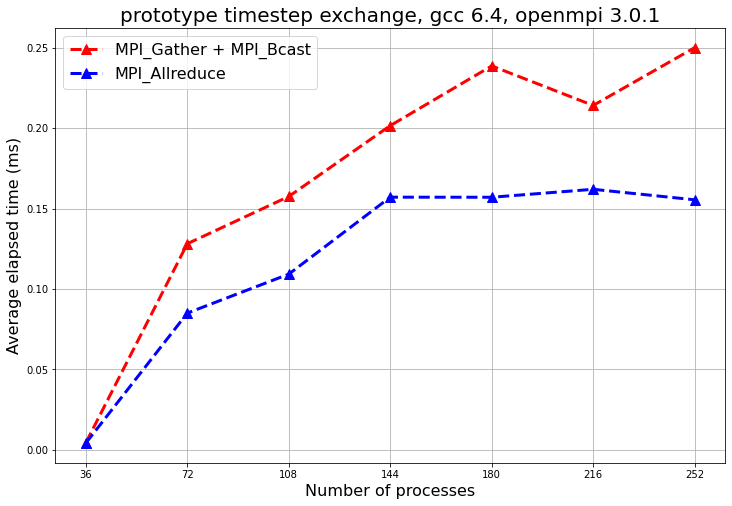

In [11]:
linewidth = 3
markersize = 10
fig, ax = plt.subplots(figsize=(12, 8))

ax.plot(p, data[0, :], '^--', label="MPI_Gather + MPI_Bcast", 
        linewidth=linewidth, markersize=markersize, color='red')
ax.plot(p, data[1, :], '^--', label="MPI_Allreduce", 
        linewidth=linewidth, markersize=markersize, color='blue')
ax.legend(loc='best', fontsize=16)
ax.set_title("prototype timestep exchange, gcc 6.4, openmpi 3.0.1", fontsize=20)
ax.set_xlabel("Number of processes", fontsize=16)
ax.set_xticks(p)
ax.set_ylabel("Average elapsed time (ms)", fontsize=16)
ax.grid(True);

# fig.savefig("exchange-dt-gcc+openmpi.png", dpi=100, facecolor='w')

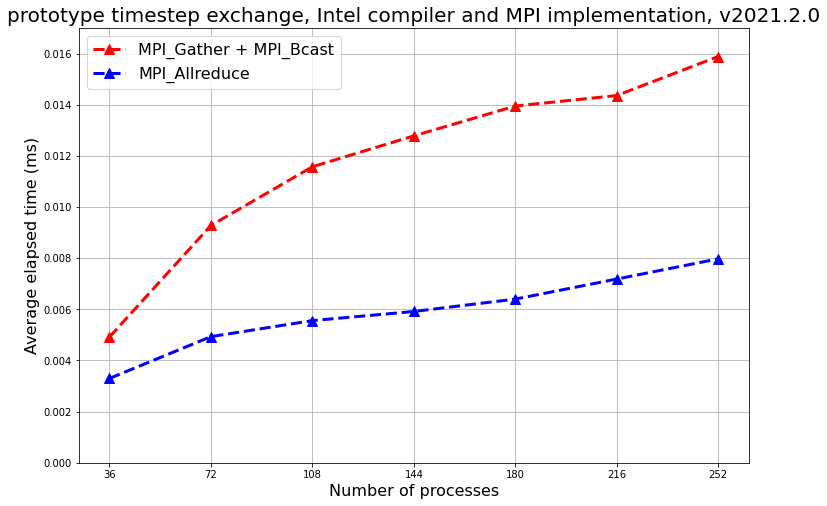

In [12]:
fig, ax = plt.subplots(figsize=(12, 8))

ax.plot(p, data[2, :], '^--', label="MPI_Gather + MPI_Bcast", 
        linewidth=linewidth, markersize=markersize, color='red')
ax.plot(p, data[3, :], '^--', label="MPI_Allreduce", 
        linewidth=linewidth, markersize=markersize, color='blue')
ax.legend(loc='best', fontsize=16)
ax.set_title("prototype timestep exchange, Intel compiler and MPI implementation, v2021.2.0", fontsize=20)
ax.set_xlabel("Number of processes", fontsize=16)
ax.set_xticks(p)
ax.set_ylabel("Average elapsed time (ms)", fontsize=16)
ax.set_ylim(0.0, 0.017)
ax.grid(True);

# fig.savefig("exchange-dt-intel.png", dpi=100, facecolor='w')

In [16]:
# SHM

[123488, 87720, 71536, 61744, 50384, 43608]

In [17]:
# first run: intel v2021.2.0
wct_ptp = [
0.00018951897218357771,
0.00013449247484095394,
0.00011412415560334921,
9.4917667796835299e-05,
7.7420479035936299e-05,
6.7036786116659642e-05]

wct_shm_0 = [
0.00023686282872222364,
0.00015194011398125441,
0.00012397716264240445,
0.00010799924517050386,
8.8732326054014263e-05,
7.8824578318744892e-05]

wct_shm_1 = [
0.00025129264348652212,
0.0001785004329867661,
0.00014475586870685219,
0.00012711204611696303,
0.0001069551669061184,
9.3420554767362769e-05]

# to ms
wct_ptp = np.array(wct_ptp) * 1000
wct_shm_0 = np.array(wct_shm_0) * 1000
wct_shm_1 = np.array(wct_shm_1) * 1000

# these are just the average message sizes for the strong scaling
# benchmark for nodes in [1,7] (iSALE3D with 2D domain decomp)
mean_msg_sizes = [123488, 87720, 71536, 61744, 50384, 43608]

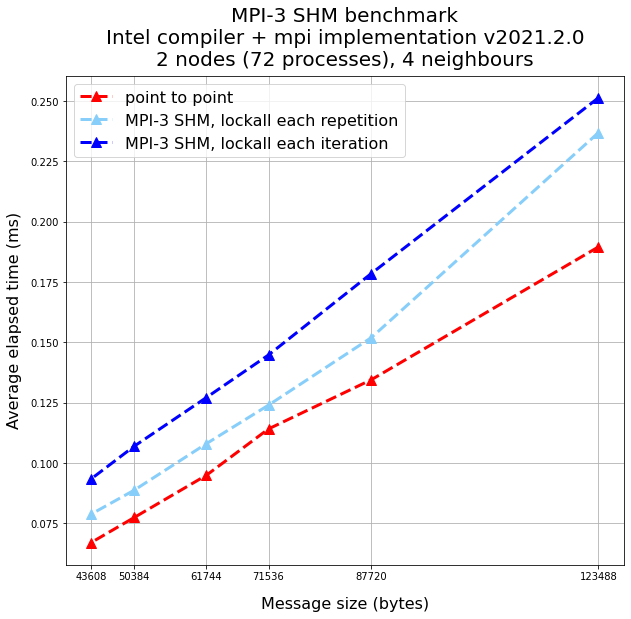

In [19]:
linewidth = 3
markersize = 10
fig, ax = plt.subplots(figsize=(10, 9))

# fig.subplots_adjust(top=1.)

ax.plot(mean_msg_sizes, wct_ptp, '^--', label="point to point", 
        linewidth=linewidth, markersize=markersize, color='red')
ax.plot(mean_msg_sizes, wct_shm_0, '^--', label="MPI-3 SHM, lockall each repetition", 
        linewidth=linewidth, markersize=markersize, color='lightskyblue')
ax.plot(mean_msg_sizes, wct_shm_1, '^--', label="MPI-3 SHM, lockall each iteration", 
        linewidth=linewidth, markersize=markersize, color='blue')
ax.legend(loc='best', fontsize=16)
ax.set_title("MPI-3 SHM benchmark\nIntel compiler + mpi implementation v2021.2.0\n2 nodes (72 processes), 4 neighbours", 
             fontsize=20, pad=10)
ax.set_xlabel("Message size (bytes)", fontsize=16, labelpad=15)
ax.set_ylabel("Average elapsed time (ms)", fontsize=16, labelpad=8)
ax.set_xticks(mean_msg_sizes)
ax.grid(True);

# fig.savefig("shm-intel2021.png", dpi=100, facecolor='w')

In [22]:
# second run: intel v17.0.4
wct_ptp = [
0.00012559795379638673,
8.9413881301879882e-05,
7.2842121124267576e-05,
6.9984912872314456e-05,
5.6124925613403321e-05,
4.5634984970092776e-05]

wct_shm_0 = [
0.00016367888450622559,
0.00011801600456237793,
9.71379280090332e-05,
8.4656000137329097e-05,
7.1288108825683598e-05,
6.2941074371337897e-05]

wct_shm_1 = [
0.00016265797615051269,
0.0001177828311920166,
9.8325967788696287e-05,
8.5798025131225586e-05,
7.0720911026000977e-05,
6.3154935836791997e-05]

# to ms
wct_ptp = np.array(wct_ptp) * 1000
wct_shm_0 = np.array(wct_shm_0) * 1000
wct_shm_1 = np.array(wct_shm_1) * 1000

# these are just the average message sizes for the strong scaling
# benchmark for nodes in [1,7] (iSALE3D with 2D domain decomp)
mean_msg_sizes = [123488, 87720, 71536, 61744, 50384, 43608]

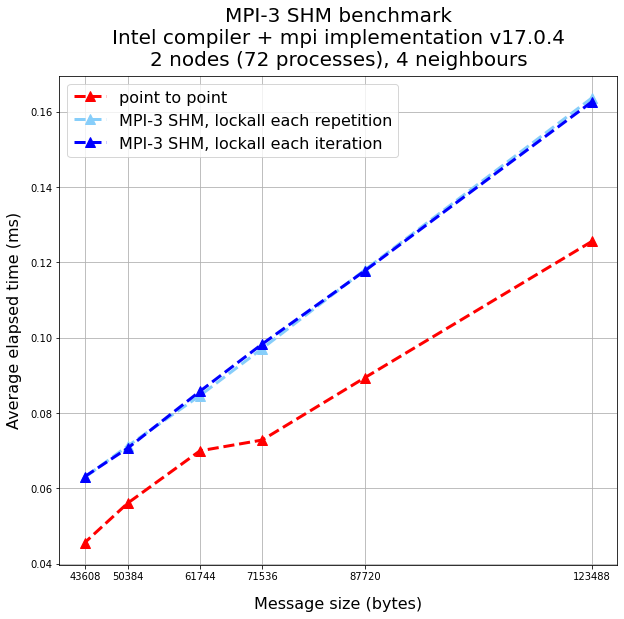

In [23]:
linewidth = 3
markersize = 10
fig, ax = plt.subplots(figsize=(10, 9))

# fig.subplots_adjust(top=1.)

ax.plot(mean_msg_sizes, wct_ptp, '^--', label="point to point", 
        linewidth=linewidth, markersize=markersize, color='red')
ax.plot(mean_msg_sizes, wct_shm_0, '^--', label="MPI-3 SHM, lockall each repetition", 
        linewidth=linewidth, markersize=markersize, color='lightskyblue')
ax.plot(mean_msg_sizes, wct_shm_1, '^--', label="MPI-3 SHM, lockall each iteration", 
        linewidth=linewidth, markersize=markersize, color='blue')
ax.legend(loc='best', fontsize=16)
ax.set_title("MPI-3 SHM benchmark\nIntel compiler + mpi implementation v17.0.4\n2 nodes (72 processes), 4 neighbours", 
             fontsize=20, pad=10)
ax.set_xlabel("Message size (bytes)", fontsize=16, labelpad=15)
ax.set_ylabel("Average elapsed time (ms)", fontsize=16, labelpad=8)
ax.set_xticks(mean_msg_sizes)
ax.grid(True);

# fig.savefig("shm-intel17.png", dpi=100, facecolor='w')

In [ ]:
# 2D DOMAIN DECOMPOSITION.. not related to this prototype -- sorry, I'm just putting it here as it's handy

In [201]:
PROCESSES = np.array([1, 36, 72, 108, 144, 216, 288])

# mpi-communication branch wall clock times
WCT_1 = np.array([2.041963E+04, 8.724865E+02, 4.769922E+02, 3.465115E+02, 
                  2.881871E+02, 2.208104E+02, 1.855679E+02])
# mpi-2d-decomposition branch wall clock times
WCT_2 = np.array([np.NAN, 8.268870E+02, 4.349156E+02, 3.036318E+02, 
                  2.441523E+02, 1.737583E+02, 1.537882E+02])

# speedup = T serial / T parallel
T_serial = WCT_1[0]
SPEEDUP_1 = T_serial / WCT_1
SPEEDUP_2 = T_serial / WCT_2

# strong scaling = speedup / number of processes
STRONG_SCALING_1 = SPEEDUP_1 / PROCESSES
STRONG_SCALING_2 = SPEEDUP_2 / PROCESSES

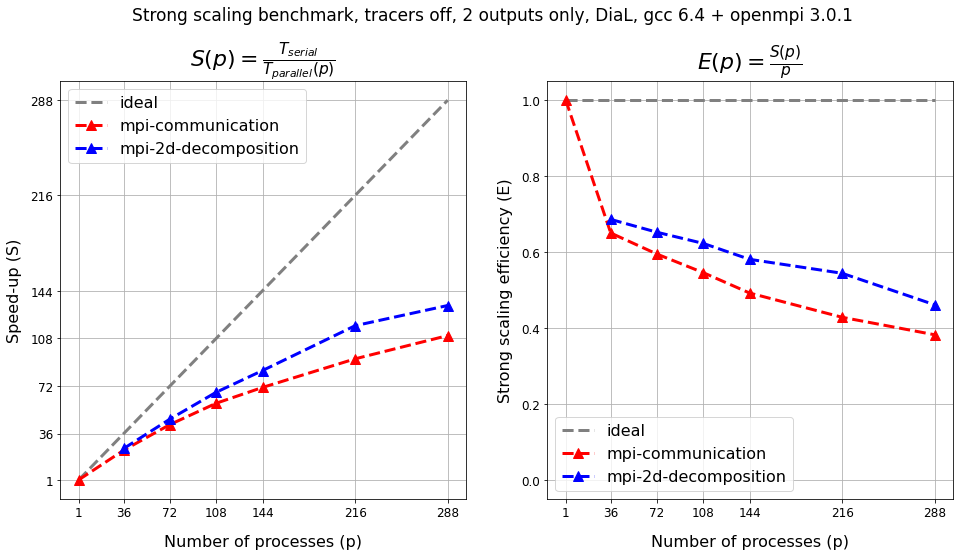

In [202]:
linewidth = 3
markersize = 10
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 8))

fig.suptitle("Strong scaling benchmark, tracers off, 2 outputs only, DiaL, gcc 6.4 + openmpi 3.0.1", fontsize=17)
fig.subplots_adjust(top=0.85)

# speedup
ax1.plot(PROCESSES, PROCESSES, '--', label="ideal", linewidth=linewidth, color='grey')
ax1.plot(PROCESSES, SPEEDUP_1, '^--', label="mpi-communication", 
         linewidth=linewidth, markersize=markersize, color='red')#, markerfacecolor='none')
ax1.plot(PROCESSES, SPEEDUP_2, '^--', label="mpi-2d-decomposition", 
         linewidth=linewidth, markersize=markersize, color='blue')#, markerfacecolor='none')
ax1.legend(loc='best', fontsize=16)
ax1.set_title(r"$S(p)=\frac{T_{serial}}{T_{parallel}(p)}$", fontsize=22)
ax1.set_xlabel("Number of processes (p)", fontsize=16, labelpad=15)
ax1.set_ylabel("Speed-up (S)", fontsize=16, labelpad=8)
ax1.set_xticks(PROCESSES)
ax1.set_yticks(PROCESSES)
ax1.tick_params(axis='both', labelsize=12)
ax1.grid(True);

# strong scaling
ax2.plot(PROCESSES, [1] * len(PROCESSES), '--', label="ideal", linewidth=linewidth, color='grey')
ax2.plot(PROCESSES, STRONG_SCALING_1, '^--', label="mpi-communication", 
         linewidth=linewidth, markersize=markersize, color='red')
ax2.plot(PROCESSES, STRONG_SCALING_2, '^--', label="mpi-2d-decomposition", 
         linewidth=linewidth, markersize=markersize, color='blue')
ax2.legend(loc='best', fontsize=16)
ax2.set_title(r"$E(p)=\frac{S(p)}{p}$", fontsize=22)
ax2.set_xlabel("Number of processes (p)", fontsize=16, labelpad=15)
ax2.set_ylabel("Strong scaling efficiency (E)", fontsize=16, labelpad=8)
# ax2.set_xlim(-0.05, 300)
ax2.set_ylim(-0.05, 1.05)
ax2.set_xticks(PROCESSES)
ax2.tick_params(axis='both', labelsize=12)
ax2.grid(True);

# fig.savefig("strong-scaling.png", dpi=200, facecolor='w')

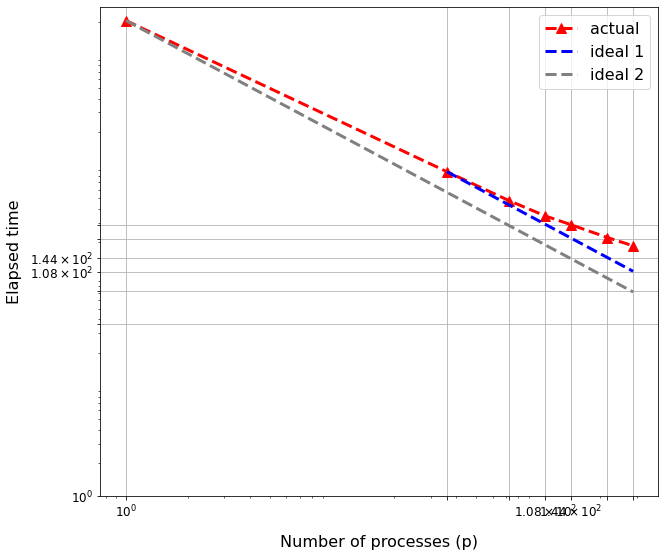

In [193]:
fig, ax = plt.subplots(figsize=(10, 9))

NODES = np.array([1,2,3,4,6,8])
# fig.subplots_adjust(top=1.)

ax.loglog(PROCESSES, WCT_1, '^--', label="actual", 
        linewidth=linewidth, markersize=markersize, color='red')
ax.loglog(PROCESSES[1:], WCT_1[1] / (PROCESSES[1:] / 36), '--', label="ideal 1", 
        linewidth=linewidth, markersize=markersize, color='blue')
ax.loglog(PROCESSES, WCT_1[0] / PROCESSES, '--', label="ideal 2", 
        linewidth=linewidth, markersize=markersize, color='gray')
ax.legend(loc='best', fontsize=16)
#ax.set_title("MPI-3 shared memory benchmark\nIntel compiler + mpi implementation v2021.2.0\n2 nodes (72 processes)", 
#             fontsize=20, pad=10)
ax.set_xlabel("Number of processes (p)", fontsize=16, labelpad=15)
ax.set_ylabel("Elapsed time", fontsize=16, labelpad=8)
ax.set_xticks(PROCESSES)
ax.set_yticks(PROCESSES)
ax.tick_params(axis='both', labelsize=12)
ax.grid(True);

fig.savefig("strong-scaling-study.png", dpi=100, facecolor='w');